In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv('labels.csv')
df.head()


,Unnamed: 0,frame,track_id,type,truncated,occluded,alpha,left,top,right,bottom,dim1,dim2,dim3,loc1,loc2,loc3,rot_y,score
0,0,000000_0000.png,-1,DontCare,-1,-1,-10.000000,219.310000,188.490000,245.500000,218.560000,-1000.000000,-1000.000000,-1000.000000,-10.000000,-1.000000,-1.000000,-1.000000,NaN
1,1,000000_0000.png,-1,DontCare,-1,-1,-10.000000,47.560000,195.280000,115.480000,221.480000,-1000.000000,-1000.000000,-1000.000000,-10.000000,-1.000000,-1.000000,-1.000000,NaN
2,2,000000_0000.png,0,Van,0,0,-1.793451,296.744956,161.752147,455.226042,292.372804,2.000000,1.823255,4.433886,-4.552284,1.858523,13.410495,-2.115488,NaN
3,3,000000_0000.png,1,Cyclist,0,0,-1.936993,737.619499,161.531951,931.112229,374.000000,1.739063,0.824591,1.785241,1.640400,1.675660,5.776261,-1.675458,NaN
4,4,000000_0000.png,2,Pedestrian,0,0,-2.523309,1106.137292,166.576807,1204.470628,323.876144,1.714062,0.767881,0.972283,6.301919,1.652419,8.455685,-1.900245,NaN


In [3]:
df.columns

Index(['Unnamed: 0', 'frame', 'track_id', 'type', 'truncated', 'occluded',
       'alpha', 'left', 'top', 'right', 'bottom', 'dim1', 'dim2', 'dim3',
       'loc1', 'loc2', 'loc3', 'rot_y', 'score'],
      dtype='object')

In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df.head()

,frame,track_id,type,truncated,occluded,alpha,left,top,right,bottom,dim1,dim2,dim3,loc1,loc2,loc3,rot_y,score
0,000000_0000.png,-1,DontCare,-1,-1,-10.000000,219.310000,188.490000,245.500000,218.560000,-1000.000000,-1000.000000,-1000.000000,-10.000000,-1.000000,-1.000000,-1.000000,NaN
1,000000_0000.png,-1,DontCare,-1,-1,-10.000000,47.560000,195.280000,115.480000,221.480000,-1000.000000,-1000.000000,-1000.000000,-10.000000,-1.000000,-1.000000,-1.000000,NaN
2,000000_0000.png,0,Van,0,0,-1.793451,296.744956,161.752147,455.226042,292.372804,2.000000,1.823255,4.433886,-4.552284,1.858523,13.410495,-2.115488,NaN
3,000000_0000.png,1,Cyclist,0,0,-1.936993,737.619499,161.531951,931.112229,374.000000,1.739063,0.824591,1.785241,1.640400,1.675660,5.776261,-1.675458,NaN
4,000000_0000.png,2,Pedestrian,0,0,-2.523309,1106.137292,166.576807,1204.470628,323.876144,1.714062,0.767881,0.972283,6.301919,1.652419,8.455685,-1.900245,NaN


In [6]:
filt = (df['type']=='Car') | (df['type']=='Pedestrian')

In [7]:
print('number of frames in the dataset :',6112) #len(os.listdir('det/images/train/'))+len(os.listdir('det/images/val/'))
print('number of labeled frames:' ,len(df['frame'].unique()))
print('number of unlabeled frames:', 6112-6028)
print('number of frames that have pedestrian or car object:',len(df[filt]['frame'].unique()))

number of frames in the dataset : 6112
number of labeled frames: 6028
number of unlabeled frames: 84
number of frames that have pedestrian or car object: 5269


In [8]:
labels = df['type'].unique()
print('Class Type in the dataset:',labels)

Class Type in the dataset: ['DontCare' 'Van' 'Cyclist' 'Pedestrian' 'Car' 'Truck' 'Misc' 'Tram'
 'Person']


C:\Users\Zeyad\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

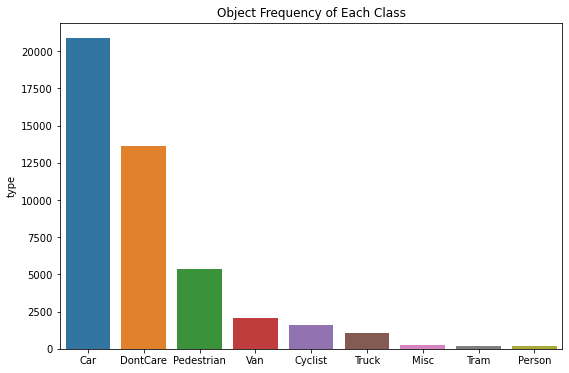

In [9]:
class_freq = df['type'].value_counts()
class_freq.index
plt.figure(figsize=(9,6))
#color = ['teal','green','yellow','purple','tomato','pink','mistyrose','springgreen','brown']
fig1 = sns.barplot(class_freq.index, class_freq)
plt.title('Object Frequency of Each Class')
total = int(np.sum(class_freq))
percentage = pd.DataFrame([int(x)/total for x in class_freq],columns =['percentage'],index = class_freq.index)
plt.show


In [10]:
percentage

,percentage
Car,0.461726
DontCare,0.301285
Pedestrian,0.119037
Van,0.045407
Cyclist,0.036052
Truck,0.023091
Misc,0.005773
Tram,0.003937
Person,0.003694


C:\Users\Zeyad\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Number of objects per frame frequency'}, ylabel='Density'>

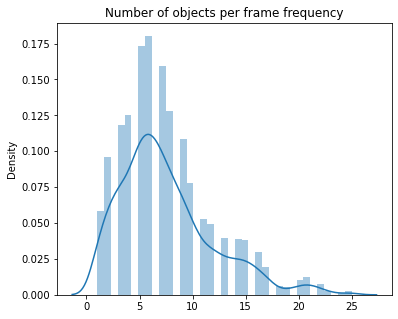

In [11]:
object_occur = sorted(df['frame'].value_counts())
plt.figure(figsize = (6,5))
plt.title('Number of objects per frame frequency')
sns.distplot(object_occur)